SRIP 2024 Selection Task: Develop Spiromask end to end

I recorded the audio on my laptop using microphones inside a normal cloth mask

I have used the library librosa since it has various applications in audio processing, and can therfore be used in conjunction for ML related tasks. The sampling rate can also be found from the recording device which is what i did earlier-

These are the steps I followed to find sampling rate in Windows 11 Laptop:

Go to Control Panel > Hardware and Sound > Sound > Recording Tab : Select the microphone used to record your audio> Right click and click on Properties > Advanced Tab
The sampling rate of my microphone is 48000 Hz or 48000 samples per second.

![Image Description](sample_rate.png)


Find out the sampling rate of audio that you recorded.

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

audio_file = 'Breathing_srip.m4a'

y, sr = librosa.load(audio_file, sr=None)  

print("Sample rate:", sr, "Hz")


C:\Users\npkas\AppData\Local\Temp\ipykernel_7864\2464876180.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)  # Load with original sampling rate


Sample rate: 48000 Hz


You use any tool of your choice to filter higher frequencies

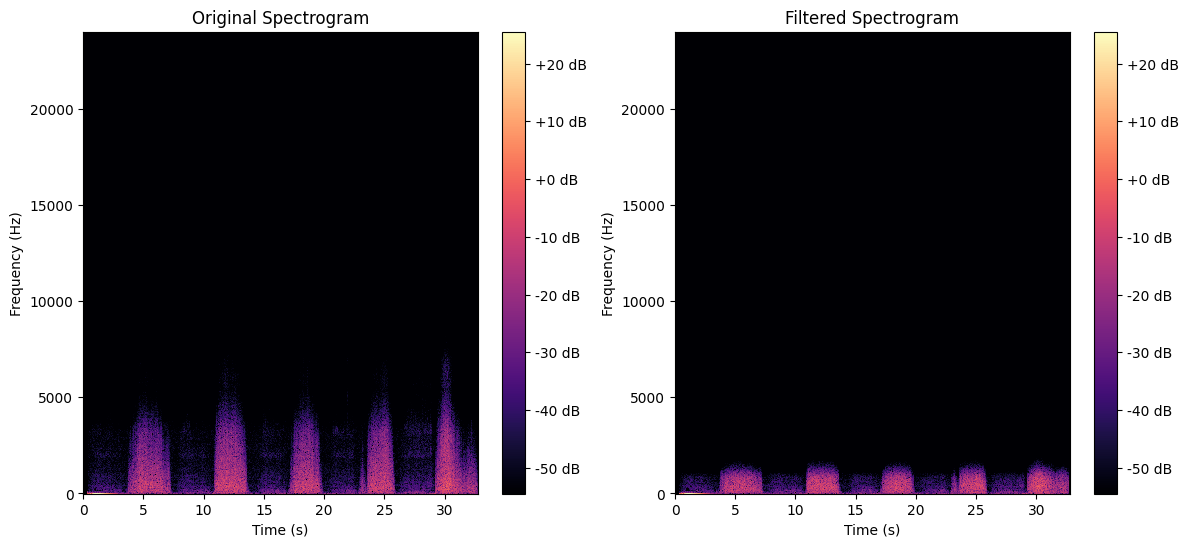

In [2]:
def low_pass_filter(signal, sr, cutoff_freq): 
# i assumed filter high frequencies means filter them out hence i have used a low pass filter to exclude frequencies above the cutoff frequency
    # Normalize cutoff frequency
    cutoff_norm = cutoff_freq / (sr / 2)
    # Design a low-pass filter
    b, a = butter(4, cutoff_norm, btype='lowpass')
    # Apply the filter to the signal
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal


S_orig = librosa.stft(y)
S_orig_db = librosa.amplitude_to_db(abs(S_orig))

y_filtered = low_pass_filter(y, sr, cutoff_freq=1000)
S_filtered = librosa.stft(y_filtered)
S_filtered_db = librosa.amplitude_to_db(abs(S_filtered))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
librosa.display.specshow(S_orig_db, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(1,2,2)
librosa.display.specshow(S_filtered_db, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.show()

In what frequency range is the breathing information present?

In [3]:
freq_range = librosa.fft_frequencies(sr=sr)
print("Frequency range:", freq_range.min(), "Hz -", freq_range.max(), "Hz")

Frequency range: 0.0 Hz - 24000.0 Hz


Although the frequency range for the file is as above, but we can observe visually that most of the meaningful breathing information is present between 0-5000 Hz from the spectrogram. This can be confirmed by finding the dominant frequencies present in signal by performing a Fast Fourier Transform on it : frequencies between 0 and 5000 Hz have higher magnitudes.

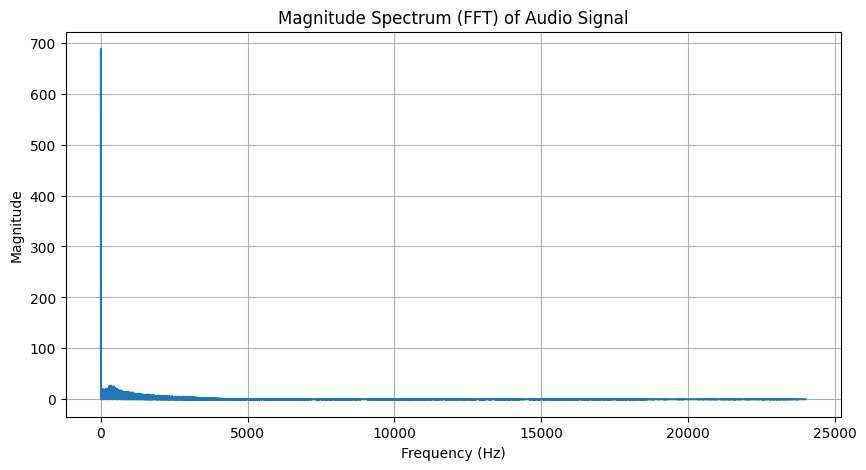

In [10]:
import numpy as np

fft_result = np.fft.fft(y)

sample_rate = 48000 
freqs = np.fft.fftfreq(len(fft_result), 1 / sample_rate)

plt.plot(freqs[:len(freqs)//2], np.abs(fft_result)[:len(freqs)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (FFT) of Audio Signal')
plt.grid(True)
plt.show()
